# _Работа 8:_ Выгорание ядерного топлива и компенсация избыточной реактивности

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
import pyGetera

## Ячейка корпусного реактора

In [119]:
vver = pyGetera.GeteraInterface(
    getera_path='D:\\bin\\',
    input_file='lab8VVER.txt',
    output_file='lab8VVER.out')

ptop0 = 10.97*6.02*10**(23)/269.928
pzam01 = 0.7*6.02*10**(23)/18.015
Rho1 = pd.DataFrame({'x':[3.0]})
Rho1['pzam'] = pzam01 
Rho1['ptop'] = ptop0 
Rho1['u235'] = (0.03)*ptop0*10**(-24)
Rho1['u238'] = (1-0.03)*ptop0*10**(-24)
Rho1['o']    = 2*ptop0*10**(-24)
Rho1['zr']   = 0.03891
Rho1['*h*']  = 2*pzam01*10**(-24)
Rho1['*o*']  = pzam01*10**(-24)

Rcell = 0.38
d = 0.6
delta_t = 0.05

vver.input({
        'r':    [d/2 - delta_t,   d/2,            Rcell],
        'u235': [Rho1['u235'][0], 0,              0],
        'u238': [Rho1['u238'][0], 0,              0],
        'o':    [Rho1['o'][0],    0,              0],
        'zr':   [0,               Rho1['zr'][0],  0],
        '*h*':  [0,               0,              Rho1['*h*'][0]],
        '*o*':  [0,               0,              Rho1['*o*'][0]]
    })
Rho1

,x,pzam,ptop,u235,u238,o,zr,*h*,*o*
0,3.0,2.339162e+22,2.446556e+22,0.000734,0.023732,0.048931,0.03891,0.046783,0.023392


In [120]:
a = vver.output(isotope=['u235','pu39','pu40'], 
            columns = ['keff', 'aver_burn', 
                       'ρ(pu40)', 'ρ(u235)', 'ρ(pu39)'])
a['aver_burn'] = [0] + a['aver_burn'] 
a['ρ(u235)'] = a['ρ(u235)'][1:]
a = pd.DataFrame.from_dict(a)
a

,keff,aver_burn,ρ(pu40),ρ(u235),ρ(pu39)
0,1.12150,0.0000,3.418100e-09,0.000730,0.000001
1,1.08730,1.4769,9.024600e-07,0.000694,0.000029
2,1.06290,2.8188,2.817800e-06,0.000661,0.000055
3,1.04260,4.1582,5.237300e-06,0.000630,0.000077
4,1.02430,5.4964,7.970200e-06,0.000602,0.000098
5,1.00830,6.8345,1.091300e-05,0.000576,0.000117
6,0.99423,8.1728,1.400200e-05,0.000552,0.000135
7,0.98182,9.5118,1.719700e-05,0.000528,0.000151
8,0.97071,10.8520,2.046600e-05,0.000507,0.000167
9,0.96067,12.1930,2.378600e-05,0.000486,0.000182


## Расчет с Гадолинием

In [121]:

vver = pyGetera.GeteraInterface(
    getera_path='D:\\bin\\',
    input_file='lab8VVER.txt',
    output_file='lab8VVER.out')
ptop0 = 10.97*6.02*10**(23)/269.928
pzam01 = 0.7*6.02*10**(23)/18.015
Rho1 = pd.DataFrame({'x':[3.0]})
Rho1['pzam'] = pzam01 
Rho1['ptop'] = ptop0 
Rho1['u235'] = (0.03)*ptop0*10**(-24)
Rho1['u238'] = (1-0.03)*ptop0*10**(-24)
Rho1['o']    = 2*ptop0*10**(-24)
Rho1['zr']   = 0.03891
Rho1['*h*']  = 2*pzam01*10**(-24)
Rho1['*o*']  = pzam01*10**(-24)

Rcell = 0.38
d = 0.6
delta_t = 0.05

vver.input({
        'r':    [d/2 - delta_t,   d/2,            Rcell],
        'u235': [Rho1['u235'][0], 0,              0],
        'u238': [Rho1['u238'][0], 0,              0],
        'o':    [Rho1['o'][0],    0,              0],
        'zr':   [0,               Rho1['zr'][0],  0],
        '*h*':  [0,               0,              Rho1['*h*'][0]],
        '*o*':  [0,               0,              Rho1['*o*'][0]]
    })

d = vver.output(isotope=['u235','pu39','pu40', 'gd57'], 
            columns = ['keff', 'aver_burn', 
                       'ρ(pu40)', 'ρ(u235)', 'ρ(pu39)', 'ρ(gd57)'])
d['aver_burn'] = [0] + d['aver_burn'] 
d['ρ(u235)'] = d['ρ(u235)'][:-1]
d['ρ(gd57)'] = d['ρ(gd57)'][:-1]
d = pd.DataFrame.from_dict(d)
d

,keff,aver_burn,ρ(pu40),ρ(u235),ρ(pu39),ρ(gd57)
0,1.00010,0.0000,3.930300e-09,0.000734,0.000002,1.000600e-06
1,1.01710,1.4821,9.774300e-07,0.000730,0.000031,5.689400e-07
2,1.06100,2.8240,2.943800e-06,0.000694,0.000056,3.738600e-09
3,1.04240,4.1629,5.389900e-06,0.000661,0.000079,3.721800e-09
4,1.02420,5.5008,8.137400e-06,0.000631,0.000099,5.300200e-09
5,1.00830,6.8386,1.108800e-05,0.000603,0.000118,6.801100e-09
6,0.99431,8.1767,1.418100e-05,0.000577,0.000136,8.281700e-09
7,0.98195,9.5155,1.737700e-05,0.000552,0.000153,9.809800e-09
8,0.97088,10.8550,2.064600e-05,0.000529,0.000168,1.144200e-08
9,0.96087,12.1960,2.396400e-05,0.000508,0.000183,1.322600e-08


In [118]:
keffarr = b['keff'].values
averarr = b['aver_burn'].values
def ptmax(j): return sum([x*np.abs(z-y) for x,y,z in zip(keffarr, averarr, averarr[1:])][:j+1])/averarr[j]
[ptmax(j) for j in range(1,20)]

[2.7106022716807368,
 2.0666133290353774,
 1.8289302074598022,
 1.6999196753443941,
 1.6154782818800892,
 1.5533281604387434,
 1.5040129425397588,
 1.4628668921286887,
 1.4266502121949698,
 1.3940861100174364,
 1.3639793699134977,
 1.3357690824998827,
 1.3089046992758337,
 1.283254964758951,
 1.2585482284618854,
 1.2347190287807799,
 1.2117581672686306,
 1.1896912754447952,
 1.1258660318399718]

In [73]:
"%.05e"%(0.0000409*ptop0*10**(-24))

'1.00064e-06'

## Ячейка РБМК

In [111]:
rbmk = pyGetera.GeteraInterface(
    getera_path='D:\\bin\\',
    input_file='lab8RBMK.txt',
    output_file='lab8RBMK.out')

b = rbmk.output(isotope=['u235','pu39','pu40'], 
            columns = ['keff', 'aver_burn', 
                       'ρ(pu40)', 'ρ(u235)', 'ρ(pu39)'])
b['aver_burn'] = [0] + b['aver_burn'] 
b['ρ(u235)'] = b['ρ(u235)'][1:]
b = pd.DataFrame.from_dict(b)
b

,keff,aver_burn,ρ(pu40),ρ(u235),ρ(pu39)
0,1.45020,0.0000,3.660000e-09,0.000582,7.308600e-07
1,1.39320,1.9545,9.593300e-07,0.000532,1.351500e-05
2,1.35900,3.7227,3.144500e-06,0.000485,2.282700e-05
3,1.32960,5.4854,6.059200e-06,0.000441,2.952800e-05
4,1.29920,7.2446,9.439500e-06,0.000399,3.433400e-05
5,1.26790,9.0017,1.312200e-05,0.000360,3.773000e-05
6,1.23570,10.7580,1.699400e-05,0.000323,4.006200e-05
7,1.20240,12.5130,2.096800e-05,0.000287,4.159400e-05
8,1.16800,14.2670,2.497700e-05,0.000254,4.252700e-05
9,1.13240,16.0230,2.896400e-05,0.000222,4.301900e-05


In [1]:
def is_triple(pt): return dostup(1/3*pt) + dostup(2/3*pt) + dostup(pt)
def dostup(x):
    [x - ]
for i in a.loc[5::-1]:
    print(i)

NameError: name 'a' is not defined

In [296]:
result = pd.DataFrame(
    columns = ['PTmax', 'Kinf0','maxKinf'], 
    index = ['Однократные кампании', 'Трехкратные кампании', 'Капания с выгорающим поглотителем', 'Непрерывные перегрузки']                 )



s = result['maxKinf']['Однократные кампании'] = max(a['keff'][:5])
result['Kinf0']['Однократные кампании'] = a['keff'][0]
result['PTmax']['Однократные кампании'] = a['aver_burn'][5]
result

,PTmax,Kinf0,maxKinf
Однократные кампании,6.8345,1.1215,1.1215
Трехкратные кампании,NaN,NaN,NaN
Капания с выгорающим поглотителем,NaN,NaN,NaN
Непрерывные перегрузки,NaN,NaN,NaN


In [ ]:
c = 

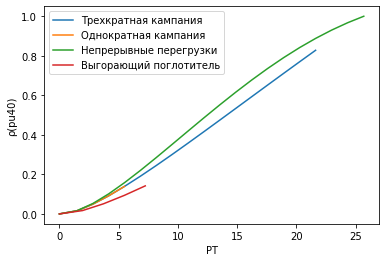

In [220]:
concs = ['ρ(u235)','ρ(pu39)','ρ(pu40)']
i = concs[2]
pl.plot(a['aver_burn'][:17], (a[i][:17]*10**24)/(a[i][19]*10**24), label='Трехкратная кампания')
pl.plot(a['aver_burn'][:5], (a[i][:5]*10**24)/(a[i][19]*10**24), label='Однократная кампания')
pl.plot(d['aver_burn'], (b[i]*10**24)/(b[i][19]*10**24), label='Непрерывные перегрузки')
pl.plot(b['aver_burn'][:5], (d[i][:5]*10**24)/(d[i][19]*10**24), label='Выгорающий поглотитель')
pl.legend()
pl.xlabel('PT')
pl.ylabel(i)
pl.show()

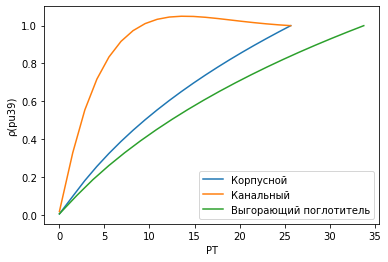

In [208]:
concs = ['ρ(u235)','ρ(pu39)','ρ(pu40)']

i = concs[1]
pl.plot(a['aver_burn'], (a[i]*10**24)/(a[i][19]*10**24), label='Корпусной')
pl.plot(d['aver_burn'], (b[i]*10**24)/(b[i][19]*10**24), label='Канальный')
pl.plot(b['aver_burn'], (d[i]*10**24)/(d[i][19]*10**24), label='Выгорающий поглотитель')
pl.legend()
pl.xlabel('PT')
pl.ylabel(i)
pl.show()

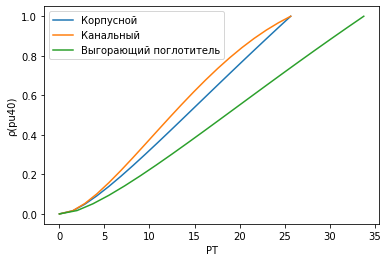

In [210]:

concs = ['ρ(u235)','ρ(pu39)','ρ(pu40)']
i = concs[2]
pl.plot(a['aver_burn'], (a[i]*10**24)/(a[i][19]*10**24), label='Корпусной')
pl.plot(d['aver_burn'], (b[i]*10**24)/(b[i][19]*10**24), label='Канальный')
pl.plot(b['aver_burn'], (d[i]*10**24)/(d[i][19]*10**24), label='Выгорающий поглотитель')
pl.legend()
pl.xlabel('PT')
pl.ylabel(i)
pl.show()

19    0.000057
Name: ρ(pu40), dtype: float64

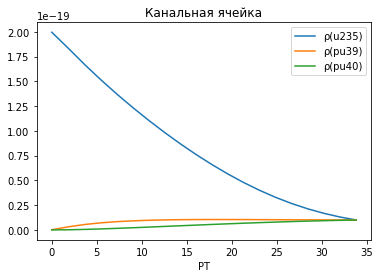

In [193]:

concs = ['ρ(u235)','ρ(pu39)','ρ(pu40)']
for i in concs:
    pl.plot(b['aver_burn'], b[i]*10**4/(b[i][19]*10**24), label=i)
    
    
pl.legend()
pl.xlabel('PT')
pl.title('Канальная ячейка')
pl.show()

In [187]:
b[i][0]*10**4/(b[i][19]*10**4)

6.143929093015057e-05

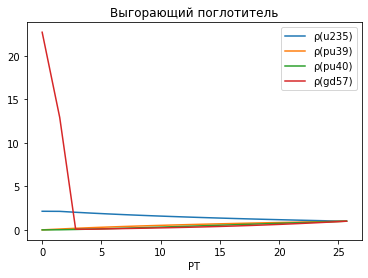

In [199]:

concs = ['ρ(u235)','ρ(pu39)','ρ(pu40)']
for i in concs + ['ρ(gd57)']:
    pl.plot(d['aver_burn'], d[i]*10**24/(d[i][19]*10**24), label=i)
pl.legend()
pl.xlabel('PT')
pl.title('Выгорающий поглотитель')
pl.show()

|Способ работы реактора              | PTₘₐₓ        |           K∞(0) |           maxK∞|
|:----------------------------------:|:----------:|:---------------:|:---------------:|
| Однократные кампании               |{{s}}       |     234         |       342       |
| Трехкратные перегрузки             |            |                 |                 |
| Кампания с выгорающим поглотителем |            |                 |                 |
| Непрерывные перегрузки             |            |                 |                 |

